In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import plotly.express as px
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

# 폰트 다운 받기
!apt -qq -y install fonts-nanum
# 폰트 설정하기 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=path, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Mounted at /gdrive


## train.csv 탐색 및 전처리

In [4]:
import pandas as pd
df = pd.read_csv("/gdrive/MyDrive/211130 RMSE TEst/Data/2019-2020.csv", engine = "python", encoding = "utf8")

In [5]:
df.head(3)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr
0,0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103
1,1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201911.0,18.0,160000.0,2.0,1988.0,언주로 103
2,2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,67.28,201905.0,4.0,124000.0,4.0,1987.0,언주로 3


In [6]:
df.head(3)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr
0,0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103
1,1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201911.0,18.0,160000.0,2.0,1988.0,언주로 103
2,2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,67.28,201905.0,4.0,124000.0,4.0,1987.0,언주로 3


#### `Unnamed: 0` 제거하기

In [8]:
del df['Unnamed: 0']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159342 entries, 0 to 159341
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    159312 non-null  object 
 1   apt                     159312 non-null  object 
 2   exclusive_use_area      159312 non-null  float64
 3   transaction_year_month  159312 non-null  float64
 4   transaction_date        159312 non-null  float64
 5   transaction_real_price  159312 non-null  float64
 6   floor                   159312 non-null  float64
 7   year_of_completion      159312 non-null  float64
 8   addr                    159312 non-null  object 
dtypes: float64(6), object(3)
memory usage: 10.9+ MB


#### 결측치 처리

In [10]:
df[df.isnull().any(axis=1)].index.shape

(30,)

In [11]:
df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159312 entries, 0 to 159311
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   city                    159312 non-null  object 
 1   apt                     159312 non-null  object 
 2   exclusive_use_area      159312 non-null  float64
 3   transaction_year_month  159312 non-null  float64
 4   transaction_date        159312 non-null  float64
 5   transaction_real_price  159312 non-null  float64
 6   floor                   159312 non-null  float64
 7   year_of_completion      159312 non-null  float64
 8   addr                    159312 non-null  object 
dtypes: float64(6), object(3)
memory usage: 10.9+ MB


#### 아파트 top10브랜드인지(1) 아닌지(0):  `top10_apt` 변수 생성

In [14]:
import re
from tqdm.notebook import tqdm 

In [15]:
df['apt_nm'] = 'apt_name'
for i in tqdm(range(len(df))):
   df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
df.head()

  0%|          | 0/159312 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103,개포2차현대아파트
1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201911.0,18.0,160000.0,2.0,1988.0,언주로 103,개포2차현대아파트
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,67.28,201905.0,4.0,124000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201906.0,15.0,141000.0,5.0,1987.0,언주로 3,개포6차우성아파트1동~8동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201908.0,28.0,155000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동


In [16]:
top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']

In [17]:
df['top10_apt'] = 0
for brand in tqdm(top10):
    df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
df.head()

  0%|          | 0/10 [00:00<?, ?it/s]

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103,개포2차현대아파트,0
1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201911.0,18.0,160000.0,2.0,1988.0,언주로 103,개포2차현대아파트,0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,67.28,201905.0,4.0,124000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201906.0,15.0,141000.0,5.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201908.0,28.0,155000.0,4.0,1987.0,언주로 3,개포6차우성아파트1동~8동,0


#### 시-구-동 나누기

In [18]:
city_name = df['city'].str.split(' ',expand=True)
city_name.head()

,0,1,2
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [19]:
city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
city_name.head()

,city_nm,시군구,dong
0,서울특별시,강남구,개포동
1,서울특별시,강남구,개포동
2,서울특별시,강남구,개포동
3,서울특별시,강남구,개포동
4,서울특별시,강남구,개포동


In [20]:
city_name.shape

(159312, 3)

In [21]:
df = pd.concat([df,city_name],axis = 1)
df.head(2)

,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt,city_nm,시군구,dong
0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103,개포2차현대아파트,0,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,201911.0,18.0,160000.0,2.0,1988.0,언주로 103,개포2차현대아파트,0,서울특별시,강남구,개포동


In [22]:
del df['city']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159312 entries, 0 to 159311
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     159312 non-null  object 
 1   exclusive_use_area      159312 non-null  float64
 2   transaction_year_month  159312 non-null  float64
 3   transaction_date        159312 non-null  float64
 4   transaction_real_price  159312 non-null  float64
 5   floor                   159312 non-null  float64
 6   year_of_completion      159312 non-null  float64
 7   addr                    159312 non-null  object 
 8   apt_nm                  159312 non-null  object 
 9   top10_apt               159312 non-null  int64  
 10  city_nm                 159312 non-null  object 
 11  시군구                     159312 non-null  object 
 12  dong                    159312 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 15.8+ MB


In [24]:
df.rename(columns = {'city_nm':'city'}, inplace=True)

In [25]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr,apt_nm,top10_apt,city,시군구,dong
0,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103,개포2차현대아파트,0,서울특별시,강남구,개포동


#### `addr` => `addr_kr`

In [26]:
df.rename(columns = {'addr':'addr_kr'}, inplace=True)
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr_kr,apt_nm,top10_apt,city,시군구,dong
0,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,1988.0,언주로 103,개포2차현대아파트,0,서울특별시,강남구,개포동


In [27]:
import numpy as np

#### 불필요한 변수 제거

In [28]:
#'transaction_id'
df.drop([ 'addr_kr'], axis = 1, inplace = True) # transaction_id는 인덱스와 동일하므로 삭제해도 무방

#### `age`변수 생성
- 2018 -> 2021로 변경

In [29]:
# 건축된지 얼마나 되었는지를 나타내는 변수로 변환
df['age'] = 2021 - df['year_of_completion']
df.drop('year_of_completion', axis = 1, inplace = True)

In [30]:
df.head(1)

,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age
0,개포2차현대아파트(220),77.75,201906.0,18.0,134500.0,4.0,개포2차현대아파트,0,서울특별시,강남구,개포동,33.0


#### 거래 연도-월 분리하기

In [31]:
df['transaction_year_month'] = df['transaction_year_month'].astype(int)

In [32]:
df['transaction_year_month'] = df['transaction_year_month'].astype(str)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159312 entries, 0 to 159311
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     159312 non-null  object 
 1   exclusive_use_area      159312 non-null  float64
 2   transaction_year_month  159312 non-null  object 
 3   transaction_date        159312 non-null  float64
 4   transaction_real_price  159312 non-null  float64
 5   floor                   159312 non-null  float64
 6   apt_nm                  159312 non-null  object 
 7   top10_apt               159312 non-null  int64  
 8   city                    159312 non-null  object 
 9   시군구                     159312 non-null  object 
 10  dong                    159312 non-null  object 
 11  age                     159312 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 14.6+ MB


In [34]:
df['transaction_year_month'].str[:4].astype(int)

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
159307    2020
159308    2020
159309    2020
159310    2020
159311    2020
Name: transaction_year_month, Length: 159312, dtype: int64

In [35]:
df['transaction_year_month'].str[4:].astype(int)

0          6
1         11
2          5
3          6
4          8
          ..
159307     8
159308     7
159309    12
159310     9
159311     9
Name: transaction_year_month, Length: 159312, dtype: int64

In [36]:
df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
del df['transaction_year_month']

In [37]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month
0,개포2차현대아파트(220),77.75,18.0,134500.0,4.0,개포2차현대아파트,0,서울특별시,강남구,개포동,33.0,2019,6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159312 entries, 0 to 159311
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     159312 non-null  object 
 1   exclusive_use_area      159312 non-null  float64
 2   transaction_date        159312 non-null  float64
 3   transaction_real_price  159312 non-null  float64
 4   floor                   159312 non-null  float64
 5   apt_nm                  159312 non-null  object 
 6   top10_apt               159312 non-null  int64  
 7   city                    159312 non-null  object 
 8   시군구                     159312 non-null  object 
 9   dong                    159312 non-null  object 
 10  age                     159312 non-null  float64
 11  transaction_year        159312 non-null  int64  
 12  transaction_month       159312 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 15.8+ MB


#### `floor` 범주화하기

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


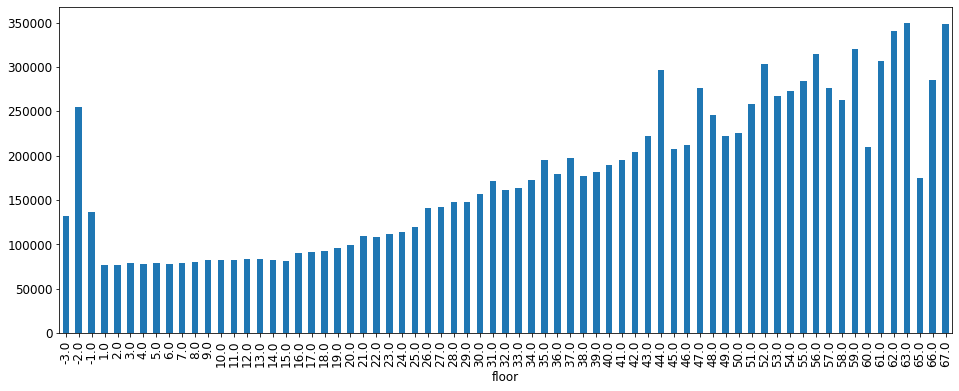

In [39]:
# floor 구간화 필요: 2층과 3층의 가격 차이가 있을까?
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16, 6)

# 대략적인 구간 확인: 1층 이하, 1 ~ 25층, 26층 ~ 49층, 50층 이상
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

##### floor < 1 제거하기

In [40]:
df[df['floor'] < 1].index

Int64Index([   789,   4599,  21343,  42672,  49016,  49092,  49095,  52734,
             67303,  67762,  68018,  68452,  68461,  68480,  68517,  68632,
             68662,  69840,  71039,  71543,  72070,  72117,  77358,  90829,
            100078, 100091, 101438, 113027, 118697, 120374, 120992, 121535,
            121536, 122160, 125760, 132322, 132334, 134428, 136385, 149688,
            150205, 150207, 150444, 150933, 150943, 150962, 150966, 152385,
            154472, 154477, 154487, 155472, 155831, 155922, 155923],
           dtype='int64')

In [41]:
df[df['floor'] < 1]

,apt,exclusive_use_area,transaction_date,transaction_real_price,floor,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month
789,이산,64.2300,14.0,40000.0,-1.0,이산,0,서울특별시,강남구,논현동,10.0,2019,10
4599,청담파라곤Ⅱ2단지,241.8800,11.0,305000.0,-1.0,청담파라곤Ⅱ2단지,0,서울특별시,강남구,청담동,11.0,2019,10
21343,천왕연지타운1단지,84.8700,11.0,70000.0,-1.0,천왕연지타운1단지,0,서울특별시,구로구,천왕동,8.0,2019,10
42672,그린빌,97.0300,14.0,82000.0,-1.0,그린빌,0,서울특별시,서대문구,북아현동,18.0,2019,10
49016,옥수파크힐스101동~116동,76.6600,15.0,151000.0,-2.0,옥수파크힐스101동~116동,0,서울특별시,성동구,옥수동,5.0,2019,6
49092,옥수파크힐스101동~116동,76.6600,30.0,170000.0,-1.0,옥수파크힐스101동~116동,0,서울특별시,성동구,옥수동,5.0,2019,11
49095,옥수파크힐스101동~116동,76.6600,4.0,167000.0,-1.0,옥수파크힐스101동~116동,0,서울특별시,성동구,옥수동,5.0,2019,12
52734,신장위아파트,80.3900,1.0,24800.0,-1.0,신장위아파트,0,서울특별시,성북구,장위동,18.0,2019,3
67303,동자,10.0200,29.0,17300.0,-1.0,동자,0,서울특별시,용산구,동자동,52.0,2019,10
67762,강변,64.4300,12.0,62500.0,-1.0,강변,0,서울특별시,용산구,이촌동,50.0,2019,12


In [42]:
df.drop(df[df['floor'] < 1].index,inplace=True)

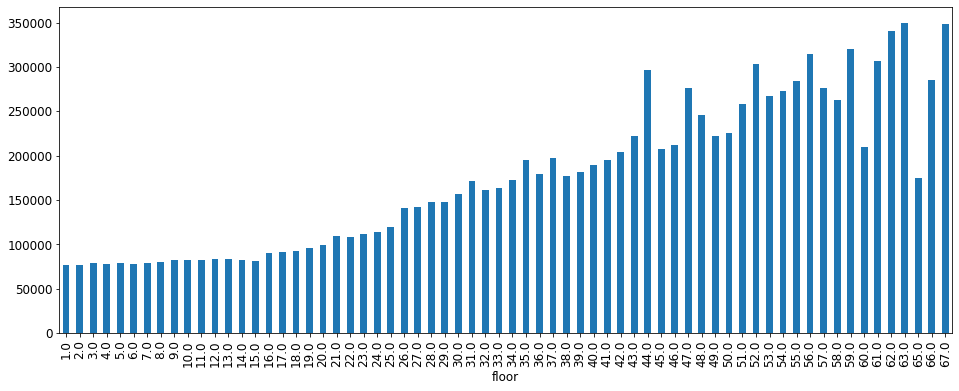

In [43]:
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

In [44]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 25:
        return "low"
    elif x <= 41:
        return "middle"
    elif x <= 50:
        return "high"    
    else:
        return "very_high"
    
df['floor_level'] = df['floor'].apply(floor_level_converter)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


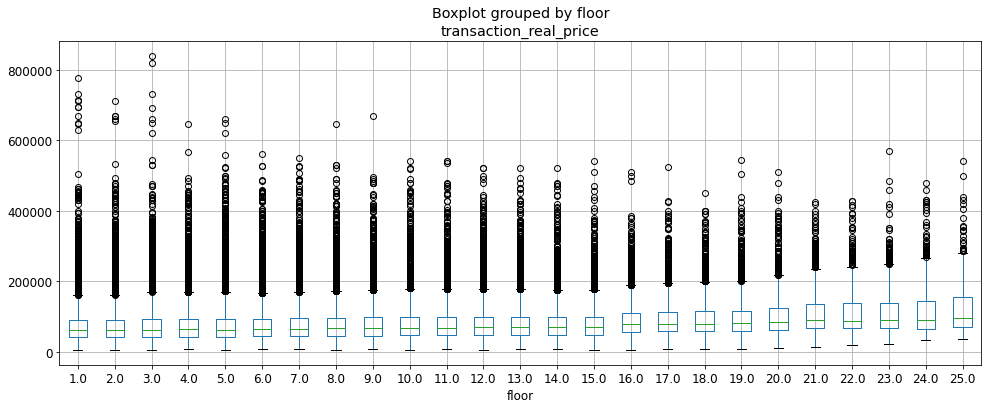

In [45]:
# 저층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'low'].boxplot(column = 'transaction_real_price', by = 'floor')

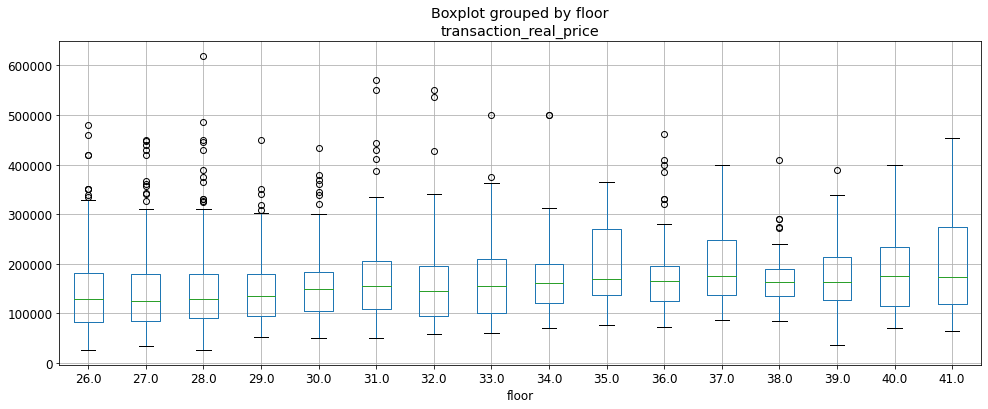

In [46]:
# 중층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'middle'].boxplot(column = 'transaction_real_price', by = 'floor')

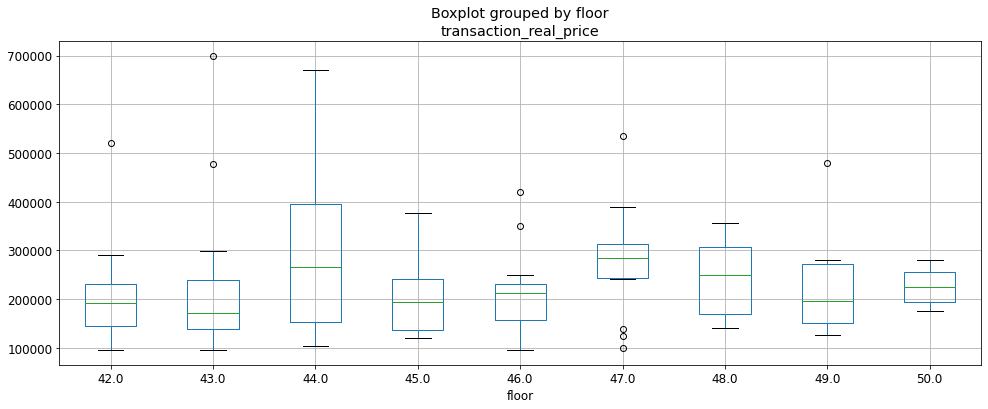

In [47]:
# 고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'high'].boxplot(column = 'transaction_real_price', by = 'floor')

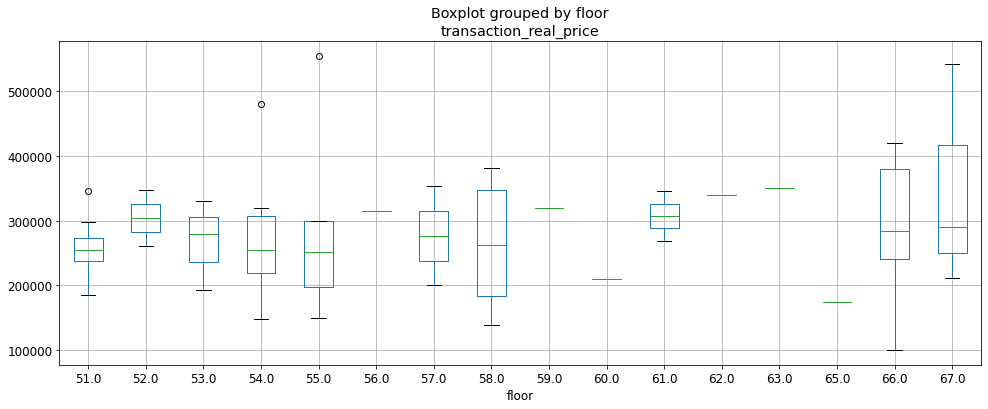

In [48]:
# 초고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층이 높으면 높을수록 가격이 더 오름 (단, 72층을 기준으로 그런 현상이 두드러짐)
df.loc[df['floor_level'] == 'very_high'].boxplot(column = 'transaction_real_price', by = 'floor')

# 결론: floor_level 변수는 유의하나, floor 변수는 초고층에서만 유의
# 따라서 very high를 세분화하거나, floor_level 변수와 floor 변수를 같이 사용하고 교호작용을 고려할 수 있는 트리 계열의 모델 사용이 적합
# 여기서는 very high를 세분화하기로 결정

In [49]:
df.drop('floor', axis = 1, inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159257 entries, 0 to 159311
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt                     159257 non-null  object 
 1   exclusive_use_area      159257 non-null  float64
 2   transaction_date        159257 non-null  float64
 3   transaction_real_price  159257 non-null  float64
 4   apt_nm                  159257 non-null  object 
 5   top10_apt               159257 non-null  int64  
 6   city                    159257 non-null  object 
 7   시군구                     159257 non-null  object 
 8   dong                    159257 non-null  object 
 9   age                     159257 non-null  float64
 10  transaction_year        159257 non-null  int64  
 11  transaction_month       159257 non-null  int64  
 12  floor_level             159257 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 17.0+ MB


#### 시세 변수 추가

In [51]:
# 구별 전체 평균 시세 부착
mean_price_per_gu = df.groupby(['city', '시군구'], as_index = False)['transaction_real_price'].mean()
mean_price_per_gu.rename({'transaction_real_price':'구별_전체_평균_시세'}, axis = 1, inplace = True)
df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구']) 

In [52]:
# 구별 작년 시세 부착
# price_per_gu_and_year 변수에 직접 수정을 하므로, df가 변경되는 것을 방지하기 위해, df.copy().groupby~를 사용
price_per_gu_and_year = df.copy().groupby(['city', '시군구', 'transaction_year'], as_index = False)['transaction_real_price'].agg(['mean', 'count'])
price_per_gu_and_year = price_per_gu_and_year.reset_index().rename({"mean":"구별_작년_평균_시세", "count":"구별_작년_거래량"}, axis = 1)

price_per_gu_and_year['transaction_year'] += 1 # 작년것을 붙이기 위해, 1을 더함
df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left') # 작년 기록이 없어서 붙지 않는 것을 방지하기 위해, how = 'left'로 설정
# 작년 거래량 기록이 없기에 0으로.
df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행

In [53]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량
0,개포2차현대아파트(220),77.75,18.0,134500.0,개포2차현대아파트,0,서울특별시,강남구,개포동,33.0,2019,6,low,180385.32337,NaN,0.0


## 외부 데이터 부착

#### `편의시설통합.csv` 데이터 합치기

In [54]:
amenity = pd.read_csv("/gdrive/MyDrive/Data/편의시설통합.csv", engine = "python", encoding = "utf8")
amenity.head()

,Unnamed: 0,addr_gu,mart_num,mart_mean,hospital_num,hospital_mean,department_num,department_mean,school_num,school_mean
0,0,강남구,2,0,70,1,3,1,33,1
1,1,강동구,3,1,33,1,1,0,29,1
2,2,강북구,1,0,17,0,1,0,14,0
3,3,강서구,4,1,36,1,1,0,35,1
4,4,관악구,1,0,19,0,1,0,22,0


In [55]:
del amenity['Unnamed: 0']
del amenity['mart_num']
amenity.drop(columns=["hospital_num", "department_num", "school_num"], axis = 1, inplace=True)

In [56]:
amenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   addr_gu          25 non-null     object
 1   mart_mean        25 non-null     int64 
 2   hospital_mean    25 non-null     int64 
 3   department_mean  25 non-null     int64 
 4   school_mean      25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [57]:
pd.options.display.max_columns = 200

In [58]:
df = pd.merge(df, amenity,left_on='시군구',right_on='addr_gu',how='left')
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,addr_gu,mart_mean,hospital_mean,department_mean,school_mean
0,개포2차현대아파트(220),77.75,18.0,134500.0,개포2차현대아파트,0,서울특별시,강남구,개포동,33.0,2019,6,low,180385.32337,NaN,0.0,강남구,0,1,1,1


In [59]:
park_df = pd.read_csv("/gdrive/MyDrive/Data/backup_211124/dacon_raw_data_2017/park.csv")
park_df.head(1)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14


In [60]:
facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
for col in facility_cols:
    park_df.loc[park_df[col].notnull(), col] = 1
    park_df.loc[park_df[col].isnull(), col] = 0

In [61]:
# 동별 공원 수 
num_park_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)['park_name'].count()
num_park_per_dong.rename({"park_name":"공원수"}, axis = 1, inplace = True)

# 동별 공원에 배치된 facilty 수
num_facilty_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)[facility_cols].sum()
num_facilty_per_dong.head(1)

,city,gu,dong,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other
0,부산광역시,강서구,녹산동,1,0,1,0,1


In [62]:
# 공원 데이터 부착
df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df['공원수'].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df[facility_cols].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

In [63]:
day_care_center_df = pd.read_csv('/gdrive/MyDrive/Data/backup_211124/dacon_raw_data_2017/day_care_center.csv')
day_care_center_df.head()


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [64]:
# 불필요한 변수 제거
day_care_center_df = day_care_center_df[['city', 'gu', 'day_care_type', 'day_care_baby_num']]

In [65]:
# dummy variable : 한번만 학습. OHE불필요. 병합할 것이므로 DROP_FIRST 하지 않음.
dummy_day_care_type = pd.get_dummies(day_care_center_df['day_care_type'], drop_first = False)
dummy_day_care_type = dummy_day_care_type.add_prefix("어린이집유형_")

day_care_center_df = pd.concat([day_care_center_df, dummy_day_care_type], axis = 1)
day_care_center_df.drop('day_care_type', axis = 1, inplace = True)
day_care_center_df.head(1)

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,서울특별시,서대문구,70,0,1,0,0,0,0,0


In [66]:
aggregated_day_care_center_df = day_care_center_df.groupby(['city', 'gu'], as_index = False)[day_care_center_df.columns[2:]].sum()
aggregated_day_care_center_df.head(1)

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,부산광역시,강서구,5312,71.0,6.0,35.0,0.0,5.0,5.0,1.0


In [67]:
# 어린이집 데이터 부착
df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159257 entries, 0 to 159256
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   apt                          159257 non-null  object 
 1   exclusive_use_area           159257 non-null  float64
 2   transaction_date             159257 non-null  float64
 3   transaction_real_price       159257 non-null  float64
 4   apt_nm                       159257 non-null  object 
 5   top10_apt                    159257 non-null  int64  
 6   city                         159257 non-null  object 
 7   시군구                          159257 non-null  object 
 8   dong                         159257 non-null  object 
 9   age                          159257 non-null  float64
 10  transaction_year             159257 non-null  int64  
 11  transaction_month            159257 non-null  int64  
 12  floor_level                  159257 non-null  object 
 13 

In [69]:
df.head(1)

,apt,exclusive_use_area,transaction_date,transaction_real_price,apt_nm,top10_apt,city,시군구,dong,age,transaction_year,transaction_month,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,addr_gu,mart_mean,hospital_mean,department_mean,school_mean,공원수,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,개포2차현대아파트(220),77.75,18.0,134500.0,개포2차현대아파트,0,서울특별시,강남구,개포동,33.0,2019,6,low,180385.32337,NaN,0.0,강남구,0,1,1,1,16.0,0.0,0.0,0.0,0.0,0.0,11605.0,68.0,58.0,68.0,0.0,0.0,28.0,1.0


In [70]:
del df['apt_nm']

In [71]:
del df['addr_gu']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159257 entries, 0 to 159256
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   apt                          159257 non-null  object 
 1   exclusive_use_area           159257 non-null  float64
 2   transaction_date             159257 non-null  float64
 3   transaction_real_price       159257 non-null  float64
 4   top10_apt                    159257 non-null  int64  
 5   city                         159257 non-null  object 
 6   시군구                          159257 non-null  object 
 7   dong                         159257 non-null  object 
 8   age                          159257 non-null  float64
 9   transaction_year             159257 non-null  int64  
 10  transaction_month            159257 non-null  int64  
 11  floor_level                  159257 non-null  object 
 12  구별_전체_평균_시세                  159257 non-null  float64
 13 

In [73]:
df.columns

Index(['apt', 'exclusive_use_area', 'transaction_date',
       'transaction_real_price', 'top10_apt', 'city', '시군구', 'dong', 'age',
       'transaction_year', 'transaction_month', 'floor_level', '구별_전체_평균_시세',
       '구별_작년_평균_시세', '구별_작년_거래량', 'mart_mean', 'hospital_mean',
       'department_mean', 'school_mean', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_cultural_facitiy', 'park_facility_other', 'day_care_baby_num',
       '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인',
       '어린이집유형_직장', '어린이집유형_협동'],
      dtype='object')

### 모델 학습

In [74]:
X = df.drop(['city', 'dong', 'apt', 'transaction_date', 'transaction_real_price', '시군구', 'transaction_year', 'transaction_month'], axis = 1)
Y = df['transaction_real_price']

In [75]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape # 샘플 대비 특징이 매우 적음 => 큰 부담없이 더미화 가능
# 컬럼 타입이 섞여 있으므로, 트리 계열의 모델이 적절한 것으로 판단됨
# 또한, 샘플이 충분히 많으므로 트리 뿐만 아니라 트리 기반의 앙상블도 적절할 것으로 보임
# Tip. Decision Tree 계열의 모델은 상대적으로 전처리나 탐색의 부담이 제일 적은 모델임

(119442, 25)

In [76]:
!pip install feature_engine

     |████████████████████████████████| 180 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 56.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [77]:
# 더미화
#from feature_engine.categorical_encoders import OneHotCategoricalEncoder as OHE
from feature_engine.encoding import OneHotEncoder as OHE
dummy_model = OHE(variables = ['floor_level'],
                 drop_last = False)

dummy_model.fit(Train_X)

Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [78]:
# 변수 부착 과정에서 생성된 결측 대체
from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X) # DEFAULT: MEAN으로 대체
# imputer.transform(Train_X): nd.array
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(imputer.transform(Test_X), columns = Test_X.columns)

In [79]:
#!pip install xgboost

In [80]:
#!pip install lightgbm

In [81]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB

In [82]:
model_parameter_dict = dict()
RFR_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                   "n_estimators": [100, 200]})

XL_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                  "n_estimators": [100, 200],
                                  "learning_rate": [0.05, 0.1, 0.2]})

model_parameter_dict[RFR] = RFR_parameter_grid
model_parameter_dict[XGB] = XL_parameter_grid
model_parameter_dict[LGB] = XL_parameter_grid

In [83]:
Train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119442 entries, 0 to 119441
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   exclusive_use_area           119442 non-null  float64
 1   top10_apt                    119442 non-null  float64
 2   age                          119442 non-null  float64
 3   구별_전체_평균_시세                  119442 non-null  float64
 4   구별_작년_평균_시세                  119442 non-null  float64
 5   구별_작년_거래량                    119442 non-null  float64
 6   mart_mean                    119442 non-null  float64
 7   hospital_mean                119442 non-null  float64
 8   department_mean              119442 non-null  float64
 9   school_mean                  119442 non-null  float64
 10  공원수                          119442 non-null  float64
 11  park_exercise_facility       119442 non-null  float64
 12  park_entertainment_facility  119442 non-null  float64
 13 

In [ ]:
# 출력을 위한 max_iter_num 계산
max_iter_num = len(range(28, 4, -5)) * len(model_parameter_dict) * len(XL_parameter_grid) ** 2
           
from sklearn.metrics import mean_absolute_error as MAE
best_score = 9999999999 # 작을수록 좋은 값
iteration_num = 0
# 상호관련성 기반: mutual_info_regression , k: 특징의 개수
for k in tqdm(range(28, 4, -5)): 
    selector = SelectKBest(mutual_info_regression, k = k).fit(Train_X, Train_Y)
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)
    # lgm: nd.array로 입력하는 것이 오류 줄임.
    
    for model_func in tqdm(model_parameter_dict.keys()):
        for parameter in model_parameter_dict[model_func]:
            model = model_func(**parameter).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred_Y = model.predict(s_Test_X)
            score = MAE(Test_Y, pred_Y)
            
            if score < best_score:
                print(k, model_func, parameter, score)
                best_score = score
                best_model_func = model_func
                best_parameter = parameter
                best_selector = selector

            iteration_num += 1
            print("iter_num:{}/{}, score: {}, best_score: {}".format(iteration_num, max_iter_num, round(score, 2), round(best_score, 2)))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

28 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 3, 'n_estimators': 100} 24280.45665034021
iter_num:1/4860, score: 24280.46, best_score: 24280.46
iter_num:2/4860, score: 24301.35, best_score: 24280.46


In [ ]:
final_X = pd.concat([Train_X, Test_X], axis = 0, ignore_index = True)
final_Y = pd.concat([Train_Y, Test_Y], axis = 0, ignore_index = True)

final_model = best_model_func(**best_parameter).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축

In [ ]:
# df: 새로운 데이터 셋
# 일련의 전처리 과정
# 

In [ ]:
def pipeline(df, model, selector, mean_price_per_gu, amenity, imputer, dummy_model):
    
    # 첫 열 삭제
    del df['Unnamed: 0']
    
    # 결측치 처리
    df.drop(df[df.isnull().any(axis=1)].index, axis=0 , inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    #아파트top10 브랜드 추가하기
    df['apt_nm'] = 'apt_name'
    for i in tqdm(range(len(df))):
       df.at[i, 'apt_nm'] = re.sub('\(.*\)|\s-\s.*', '', df.at[i,'apt'])
    
    top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크|I\'PARK|I-Park|IPARK|I-PARK', '래미안', 'sk|SK|Sk|sK|에스케이', '플래티넘']
    
    df['top10_apt'] = 0
    for brand in tqdm(top10):
        df.loc[df['apt_nm'].str.contains(brand),'top10_apt'] = 1
    
    
    # 시-구-동 나누기
    city_name = df['city'].str.split(' ',expand=True)
    city_name.rename(columns = {0 : 'city_nm', 1: '시군구', 2 : 'dong' }, inplace=True)
    df = pd.concat([df,city_name],axis = 1)
    del df['city']
    df.rename(columns = {'city_nm':'city'}, inplace=True)
    
    # 'addr_kr'로 col명 변경
    df.rename(columns = {'addr':'addr_kr'}, inplace=True)
    df.drop([ 'addr_kr'], axis = 1, inplace = True)
    
    # age 변수 부착
    df['age'] = 2021 - df['year_of_completion']
    df.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    df['transaction_year_month'] = df['transaction_year_month'].astype(int) 
    df['transaction_year_month'] = df['transaction_year_month'].astype(str)
    df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
    df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
    del df['transaction_year_month']
    
    # floor_level 변수 생성
    
    df['floor_level'] = df['floor'].apply(floor_level_converter)
    df.drop('floor', axis = 1, inplace = True)    
    
    # 시세 관련 변수 추가
    df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구'])
    df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
    
    # 편의시설통합 정보 합치기
    df = pd.merge(df, amenity,left_on='시군구',right_on='addr_gu',how='left')

    # 공원 데이터 부착
    df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    df['공원수'].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)

    df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    
    facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
    df[facility_cols].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)    
    
    # 어린이집 데이터 부착
    df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
    df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
    df.drop('gu', axis = 1, inplace = True)
    
    # 불필요한 변수 삭제
    df.drop('apt_nm', axis = 1, inplace = True) 
    df.drop('addr_gu', axis = 1, inplace = True) 
    
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = df.drop(['city', 'dong', 'apt', 'transaction_date','시군구', 'transaction_real_price','transaction_year', 'transaction_month'], axis = 1)
    
    # 더미화
    X = dummy_model.transform(X)
    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return  model.predict(X)

In [ ]:
# 모델 저장
import pickle
pipeline_element = {
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_per_gu,
                   "amenity":amenity,
                   "imputer":imputer,
                   "dummy_model":dummy_model,
                   "pipeline":pipeline}

# write binary: write pickle file 
with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [ ]:
# 모델 불러오기
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)


model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
amenity = pipeline_element["amenity"]
imputer = pipeline_element["imputer"]
dummy_model = pipeline_element["dummy_model"]
pipeline = pipeline_element["pipeline"]

In [ ]:
test_df = pd.read_csv("/gdrive/MyDrive/211130 RMSE TEst/Data/test_seoul_2021.csv",engine = "python", encoding = "utf8")
test_df.head(1)

,Unnamed: 0,city,apt,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion,addr
0,0,서울특별시 강남구 개포동,개포2차현대아파트(220),77.75,202104.0,15.0,174000.0,9.0,1988.0,언주로 103


In [ ]:
test_df.shape

(41166, 10)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              41166 non-null  int64  
 1   city                    41151 non-null  object 
 2   apt                     41151 non-null  object 
 3   exclusive_use_area      41151 non-null  float64
 4   transaction_year_month  41151 non-null  float64
 5   transaction_date        41151 non-null  float64
 6   transaction_real_price  41151 non-null  float64
 7   floor                   41151 non-null  float64
 8   year_of_completion      41151 non-null  float64
 9   addr                    41151 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


- test data를 결측값이 없도록 전처리하며 reindexing해줌

In [ ]:
no_null = test_df.drop(test_df[test_df.isnull().any(axis=1)].index, axis=0)

In [ ]:
no_null.reset_index(drop=True, inplace=True)

In [ ]:
test_real_price = no_null['transaction_real_price']

In [ ]:
test_real_price

0        174000.0
1        195000.0
2        200000.0
3        220000.0
4        245000.0
           ...   
41146     88000.0
41147     30500.0
41148     49500.0
41149     30000.0
41150     61500.0
Name: transaction_real_price, Length: 41151, dtype: float64

In [ ]:
test_real_price.values

array([174000., 195000., 200000., ...,  49500.,  30000.,  61500.])

In [ ]:
test_real_price[41150]

61500.0

In [ ]:
len(test_real_price)

41151

In [ ]:
output = pipeline(test_df, model, selector, mean_price_per_gu,amenity, imputer, dummy_model)
len(output)

  0%|          | 0/41151 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

41151

In [ ]:
output

array([172454.32301439, 184016.38840382, 184016.38840382, ...,
        49160.25244369,  45321.95367101,  63427.53900966])

In [ ]:
result_df = pd.DataFrame({'predicted_price': output,'transaction_real_price':test_real_price.values})
result_df.head()

,predicted_price,transaction_real_price
0,172454.323014,174000.0
1,184016.388404,195000.0
2,184016.388404,200000.0
3,184016.388404,220000.0
4,227348.533705,245000.0


In [ ]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(result_df['predicted_price'], result_df['transaction_real_price']) 
np.sqrt(MSE)

31113.65582132874

In [ ]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [ ]:
Train_X.columns[selector.get_support()]

Index(['exclusive_use_area', 'top10_apt', 'age', '구별_전체_평균_시세', '구별_작년_평균_시세',
       '구별_작년_거래량', 'mart_mean', 'department_mean', 'school_mean', '공원수',
       'park_exercise_facility', 'park_entertainment_facility',
       'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other',
       'day_care_baby_num', '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간',
       '어린이집유형_법인·단체', '어린이집유형_사회복지법인', '어린이집유형_직장', '어린이집유형_협동'],
      dtype='object')

In [ ]:
Train_X.columns

Index(['exclusive_use_area', 'top10_apt', 'age', '구별_전체_평균_시세', '구별_작년_평균_시세',
       '구별_작년_거래량', 'mart_mean', 'hospital_mean', 'department_mean',
       'school_mean', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_cultural_facitiy', 'park_facility_other', 'day_care_baby_num',
       '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인',
       '어린이집유형_직장', '어린이집유형_협동', 'floor_level_low', 'floor_level_very_high',
       'floor_level_middle', 'floor_level_high'],
      dtype='object')